In [1]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

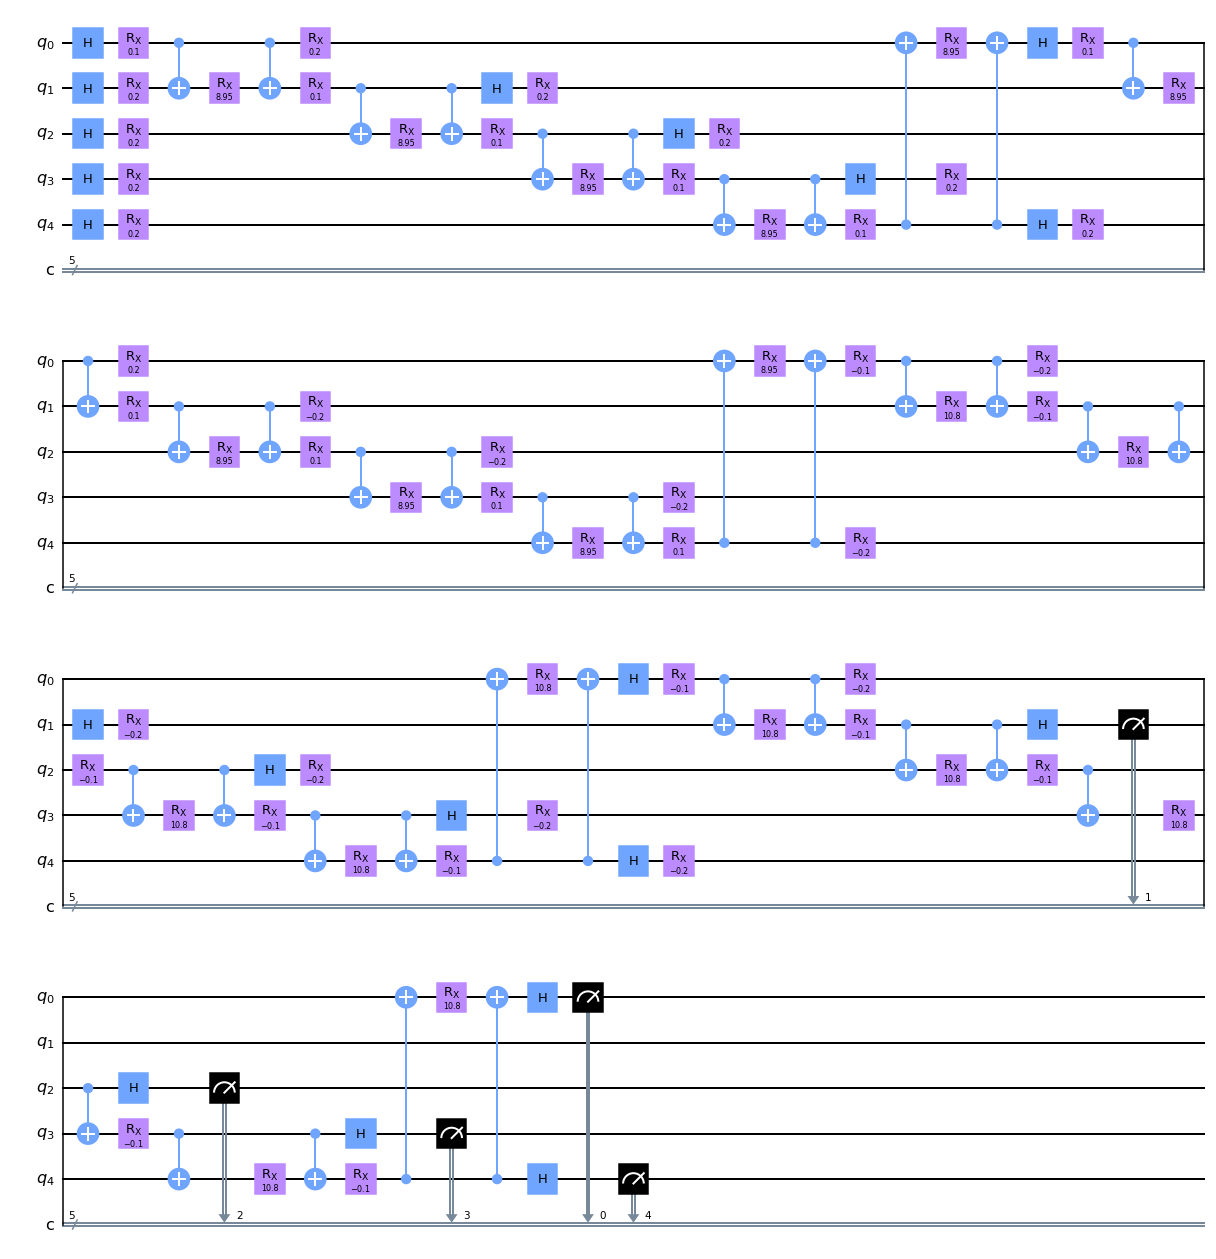

In [2]:
import math

def construct_circuit(n, x1, x2):
    qc = QuantumCircuit(n,n)
    
    # H interleave
    qc = construct_h_interleave(qc, n)
    
    # U
    qc = construct_U(qc, n, x1, x2)
    
    # H interleave
    qc = construct_h_interleave(qc, n)
    
    # U
    qc = construct_U(qc, n, x1, x2)
    
    # U+
    qc = construct_U(qc, n, -x1, -x2)
    
    # H interleave
    qc = construct_h_interleave(qc, n)
    
    # U+
    qc = construct_U(qc, n, -x1, -x2)
    
    # H interleave
    qc = construct_h_interleave(qc, n)
    
    # Measurement
    qc = measureall(qc, n)
    
    return qc
    
def measureall(qc, num):
    for i in range(num):
        qc.measure(i,i)
    return qc


    
def construct_h_interleave(qc, n):
    for i in range(n):
        qc.h(i)
        
    return qc

def construct_U(qc, n, x1, x2):

    for i in range(n-1):
        qc.rx(x1, i)
        qc.rx(x2, i+1)
        qc.cnot(i, i + 1)
        qc.rx((math.pi - x1)*(math.pi - x2), i + 1)
        qc.cnot(i, i + 1)
        
    qc.rx(x1,n-1)
    qc.rx(x2,0)
    qc.cnot(n-1,0)
    qc.rx((math.pi - x1)*(math.pi - x2), 0)
    qc.cnot(n-1, 0)

    return qc

qc = construct_circuit(5, 0.1, 0.2)
qc.draw()
        
    

In [105]:
def measureall(qc, num):
    for i in range(num):
        qc.measure(i,i)
    return qc

def my_measure(qc):
    simulator = Aer.get_backend('aer_simulator')
    circ = transpile(qc, simulator)

    # Run and get counts
    result = simulator.run(circ).result()
    counts = result.get_counts(circ)
    #plot_histogram(counts, title='Bell-State counts')
    return counts

def quantum_kernel_training(samples, quadraticz_solver, R):
    
    K = []
    # loop samples
    for i in range(len(samples)):
        long_lst = []
        for j in range(len(samples)):
            counter_0n = 0
            for shot in range(R):
                x1 = samples[i][0]
                x2 = samples[j][0]
                # construct the circuit with xi and xj
                qc = construct_circuit(5, x1, x2)
                
                # measure outcome in Z-basis
                qc = measureall(qc, 5)
                
                # Run and get counts
                simulator = Aer.get_backend('aer_simulator')
                circ = transpile(qc, simulator)
                result = simulator.run(circ).result()
                counts = result.get_counts(circ)
                max_v = 0
                outcome = ""
                for k,v in counts.items():
                    if v > max_v:
                        outcome = k
                        max_v = v
                        
                # Increase counter by one
                if outcome == "00000":
                    counter_0n = counter_0n + 1
            
            long_lst.append(counter_0n / R)
        K.append(long_lst)
            
    # Use quadratic program solver to optimize alpha in L
    # ?????????????
#     from docplex.mp.model import Model
#     mdl = Model('docplex model')
#     x = mdl.binary_var('x')
#     y = mdl.integer_var(lb=-1, ub=5, name='y')
#     mdl.minimize(x + 2 * y)
#     mdl.add_constraint(x - y == 3)
#     mdl.add_constraint((x + y) * (x - y) <= 1)
#     print(mdl.export_as_lp_string())   
    print(K)
    return K

samples = [[0.9559620992026494,0],[0.2934901444479251,1],[0.20387026635912045,1],[0.9789979134271234,0],[0.9569620992026494,0],[0.9689979134271234,0],[0.21387026635912045,1],[0.3934901444479251,1]]
quadraticz_solver = []
K = quantum_kernel_training(samples, quadraticz_solver, 10)

[[0.0, 0.4, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0], [0.5, 1.0, 1.0, 0.6, 0.8, 0.5, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.0, 0.4, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0], [0.0, 0.9, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0], [0.0, 0.7, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0]]


In [106]:
#pip install cvxopt
import numpy as np
from numpy import linalg
import cvxopt
import cvxopt.solvers
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

from sklearn.svm import SVC
from cvxopt import matrix as cvxopt_matrix 
from cvxopt import solvers as cvxopt_solvers

In [ ]:

# x_neg = np.array([[0.9559620992026494],[0.9789979134271234],[0.9569620992026494],[0.9689979134271234]])
# y_neg = np.array([1,1,1,1])
# x_pos = np.array([[0.20387026635912045],[0.2934901444479251],[0.21387026635912045],[0.3934901444479251]])
# y_pos = np.array([0,0,0,0])
# x1 = np.linspace(-10,10)
# x = np.vstack((np.linspace(-10,10),np.linspace(-10,10)))

# #Data for the next section
# X = np.vstack((x_pos, x_neg))
# y = np.concatenate((y_pos,y_neg))

# #Initializing values and computing H. Note the 1. to force to float type
# m,n = X.shape
# y = y.reshape(-1,1) * 1.
# X_dash = y * X



# #Parameters guessed by inspection
# w = np.array([1,-1]).reshape(-1,1)
# b = -3


# #Converting into cvxopt format
# def linear_kernel(x, z):
#     return np.matmul(x, z.T)

# #K = linear_kernel(X, X)
# myK = quantum_kernel_training(samples, quadraticz_solver, 10)
# P = cvxopt_matrix(np.matmul(y,y.T) * myK)

# #H = np.dot(X_dash , X_dash.T) * 1.
# #P = cvxopt_matrix(H)
# q = cvxopt_matrix(-np.ones((m, 1)))
# G = cvxopt_matrix(-np.eye(m))
# h = cvxopt_matrix(np.zeros(m))
# A = cvxopt_matrix(y.reshape(1, -1))
# b = cvxopt_matrix(np.zeros(1))

# #print(P)

# #Setting solver parameters (change default to decrease tolerance) 
# cvxopt_solvers.options['show_progress'] = False
# cvxopt_solvers.options['abstol'] = 1e-10
# cvxopt_solvers.options['reltol'] = 1e-10
# cvxopt_solvers.options['feastol'] = 1e-10

# #Run solver
# sol = cvxopt_solvers.qp(P, q, G, h, A, b)
# alphas = np.array(sol['x'])

In [138]:

x_neg = np.array([[0.9559620992026494],[0.9789979134271234],[0.9569620992026494],[0.9689979134271234]])
y_neg = np.array([1,1,1,1])
x_pos = np.array([[0.20387026635912045],[0.2934901444479251],[0.21387026635912045],[0.3934901444479251]])
y_pos = np.array([0,0,0,0])
x1 = np.linspace(0,10)
x = np.vstack((np.linspace(0,10),np.linspace(0,10)))

#Data for the next section
X = np.vstack((x_pos, x_neg))
y = np.concatenate((y_pos,y_neg))

#Initializing values and computing H. Note the 1. to force to float type
m,n = X.shape
y = y.reshape(-1,1) * 1.
X_dash = y * X



#Parameters guessed by inspection
w = np.array([1,-1]).reshape(-1,1)
b = -3


#Converting into cvxopt format
def linear_kernel(x, z):
    return np.matmul(x, z.T)

#K = linear_kernel(X, X)
myK = quantum_kernel_training(samples, quadraticz_solver, 10)
P = cvxopt_matrix(np.matmul(y,y.T) * myK)

#H = np.dot(X_dash , X_dash.T) * 1.
#P = cvxopt_matrix(H)
q = cvxopt_matrix(-np.ones((m, 1)))
G = cvxopt_matrix(-np.eye(m))
h = cvxopt_matrix(np.zeros(m))
A = cvxopt_matrix(y.reshape(1, -1))
b = cvxopt_matrix(np.zeros(1))

#print(P)

#Setting solver parameters (change default to decrease tolerance) 
cvxopt_solvers.options['show_progress'] = False
cvxopt_solvers.options['abstol'] = 1e-10
cvxopt_solvers.options['reltol'] = 1e-10
cvxopt_solvers.options['feastol'] = 1e-10

#Run solver
sol = cvxopt_solvers.qp(P, q, G, h, A, b)
alphas = np.array(sol['x'])

[[0.0, 0.5, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0], [0.7, 1.0, 1.0, 0.6, 0.6, 0.7, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.0, 0.7, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0], [0.0, 0.9, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0], [0.0, 0.6, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0]]


In [139]:
#print(alphas)
best_alphas = []
alpha_lst = alphas.tolist()
for i in range(len(alpha_lst)):
    best_alphas.append(alpha_lst[i][0])
print("Best alpha gotten from training is\n",best_alphas)
print("Bias gotten from training is",b)

Best alpha gotten from training is
 [2.5406133767929023e+299, 2.5406133767929023e+299, 2.5406133767929023e+299, 2.5406133767929023e+299, -2.1733351613514313e-11, 5.465004660330166e-12, 5.004619250833405e-12, 5.405019213258945e-12]
Bias gotten from training is [ 0.00e+00]



In [140]:
## b needs to be calculated
def quantum_kernel_classification(samples, alphas, testX, R, b=1):
    K = {}
    n = 5
    for i in range(len(samples)):
        counter_0n = 0
        for j in range(R):
            # construct circuit
            x = samples[i][0]
            #print(x)
            qc = construct_circuit(n, x, testX)
                
            # measure outcome in Z-basis
            qc = measureall(qc, 5)
            
            # Run and get counts
            simulator = Aer.get_backend('aer_simulator')
            circ = transpile(qc, simulator)
            result = simulator.run(circ).result()
            counts = result.get_counts(circ)
            max_v = 0
            outcome = ""
            for k,v in counts.items():
                if v > max_v:
                    outcome = k
                    max_v = v
                        
            # Increase counter by one
            if outcome == "00000":
                counter_0n = counter_0n + 1
                
        K[i] = counter_0n / R
    
    # calculate sign of the label
    m = 0

    for i in range(len(samples)):
        y = samples[i][1]
        alpha = alphas[i]
        m = m + y * alpha * K[i] + b
    print(K)
    print(m)
    if m > 0:
        return 0
    return 1

#     if m > 0:
#         return 1
#     return 0

In [141]:
R = 10
samples = [[0.9559620992026494,1],[0.2934901444479251,0],[0.20387026635912045,0],[0.9789979134271234,1],[0.9569620992026494,1],[0.9689979134271234,1],[0.21387026635912045,0],[0.3934901444479251,0]]

print(quantum_kernel_classification(samples, best_alphas, 0.20387026635912045, R, 0))
print(quantum_kernel_classification(samples, best_alphas, 0.9559620992026494, R, 0))
print(quantum_kernel_classification(samples, best_alphas, 0.21387026635912045, R, 0))
print(quantum_kernel_classification(samples, best_alphas, 0.7559620992026494, R, 0))

{0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0}
5.081226753585805e+299
0
{0: 0.0, 1: 0.7, 2: 1.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 1.0, 7: 0.0}
0.0
1
{0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0}
5.081226753585805e+299
0
{0: 0.0, 1: 0.9, 2: 1.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 1.0, 7: 0.6}
0.0
1


In [142]:
print(quantum_kernel_classification(samples, best_alphas, 0.3559620992026494, R, 0))

{0: 0.0, 1: 1.0, 2: 1.0, 3: 0.0, 4: 0.0, 5: 0.1, 6: 1.0, 7: 1.0}
5.465004660330166e-13
0


In [143]:
print(quantum_kernel_classification(samples, best_alphas, 0.5559620992026494, R, 0))

{0: 0.0, 1: 1.0, 2: 1.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 1.0, 7: 0.9}
0.0
1
